<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>
<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Resúmenes examen Unidad 6
<a class="tocSkip">    
</h1> 

# Imports section

In [1]:
import pandas as pd
import numpy as np
import xlrd # Para excels
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculo del pvalor 
+ Ejemplo: Nuestra $$\mu_0 = 2.5h$$ 
    Hemos encontrado un set de 100 baterías cuya $$\bar X =  2.65h$$ con una desviación estandar de $s = 0.5h$. Por lo tanto las nuevas baterias son mejores (Esta es nuestra hipotesis alternativa.
   
   
 En el ejemplo la *hipótesis alternativa* se escribe como 
    $$H_a:\{\mu\ > \mu_0\}$$
    mientras que la hipótesis nula es
    $$H_0:\mu\ \leq \mu_0\}$$
    
 Recall that in the batteries example we have
  $$
  \quad\\
  \mu_0 = 2.5,\qquad n = 100,\qquad \bar X = 2.65,\qquad  s = 0.5 
  \quad\\
  $$
  Thus the value of $Z$ that we obtain is:
  $$
  \quad\
  \dfrac{\bar X - \mu_0}{\frac{s}{\sqrt{n}}} = 
  \dfrac{2.65 - 2.5}{\frac{0.5}{\sqrt{100}}} = 3
  \quad\
  $$

In [2]:
mu0 = 2.5
n = 100
barX = 2.65 # De lo que estás intentando convencer a la gente. Tiene que ser mayor que tu mu 0, porque estás intentando convencer de que tu método e smejor, osea que tendría que ser mayor que el mu 0
# si dan p valores muy grandes, normalmente es porque te estás equivocando
s = 0.5

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))# "punto crítico", a partir del cual calcular la probabilidad de mayor (cola derecha)

# sf es la inversa de cdf, para calcular la cola derecha
pValue = stats.norm.sf(Zscore)
print("And the resulting p-value is: {:.4}".format(pValue))

The Z score for this sample is 3.0
And the resulting p-value is: 0.00135


In [3]:
# Si con los mismos datos tuviesemos una media muestral mayor (que favorece más nuestra hipotesis alternativa), calculando el pvalor
mu0 = 2.5
n = 100
barX = 2.7
s = 0.5

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))

pValue = stats.norm.sf(Zscore)
print("And the resulting p-value is: {:.4}".format(pValue))


The Z score for this sample is 4.0
And the resulting p-value is: 3.167e-05


Obtener una muestra con 𝑋¯=2,7 o superior sólo puede ocurrir unas tres de cada cien mil veces. Esa es una probabilidad muy baja y cada vez es más difícil creer que esta media muestral sea sólo una coincidencia aleatoria. Por tanto, con este valor p rechazaríamos la hipótesis nula.

# Rechazando la $H_a$
+ **Ejemplo (continuación):** Volvamos al ejemplo de las pilas pero esta vez supongamos que la media muestral que obtenemos es $\bar X = 2,51$ manteniendo todos los demás números iguales. Entonces el cálculo del valor p sería: 

In [4]:
mu0 = 2.5
n = 100
barX = 2.51
s = 0.5

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))

pValue = stats.norm.sf(Zscore)
print("And the resulting p-value is: {:.4}".format(pValue))

The Z score for this sample is 0.2
And the resulting p-value is: 0.4207


Para alguien que crea que la hipótesis nula es verdadera, eso significa que este valor 𝑋¯=2,51 de la media muestral no sería una sorpresa en absoluto. De hecho, ¡es el tipo de valor que se espera ver el 42% de las veces! Por lo tanto, con un valor p tan grande no tendríamos suficiente evidencia para rechazar el nulo y diríamos en cambio que rechazamos la alternativa 𝐻𝑎 . Aunque 𝑋¯>𝜇0 , la diferencia a favor de 𝐻𝑎 no es lo suficientemente grande.

In [5]:
mu0 = 2.5
n = 100
barX = 2.45
s = 0.5

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))

pValue = stats.norm.sf(Zscore)
print("And the resulting p-value is: {:.4}".format(pValue))

The Z score for this sample is -1.0
And the resulting p-value is: 0.8413


Por supuesto, si hubiéramos obtenido 𝑋¯≤𝜇0 la evidencia a favor de 𝐻𝑎 sería simplemente inexistente. Esto causa cierta confusión al principio, especialmente después de que aprendamos en las próximas secciones sobre otros tipos de contrastes que implican diferentes desigualdades. Así que hagamos un ejemplo para intentar ayudarte a reconocer esta situación si alguna vez te encuentras en ella. Imagina ahora que la media muestral en el ejemplo de la pila es 𝑋¯=2,45 . Con esta media muestral, intentar convencer a alguien de que 𝜇>𝜇0=2,5 es absurdo.

Como podemos ver, el valor p en este caso no sólo no es pequeño, sino que es muy grande para una probabilidad. Si alguna vez te encuentras con un valor p tan grande, *comprueba dos veces que estás probando la hipótesis correcta*: hay muchas posibilidades de que hayas cambiado alguna desigualdad. 

# Para muestras pequeñas
Antes hemos usado la normal para una muestra de mas de 100 elementos (grand). Para calcular el pvalor en muestras pequeñas deberemos usar la t de student.
+ **Ejemplo:** repetiremos el cálculo del valor p para el ejemplo original de la pila manteniendo todos los valores de la muestra excepto el tamaño, que ahora tomamos como $n = 20$. Entonces *debemos* utilizar la $t$ de Student para calcular la probabilidad de la cola derecha:

In [6]:
mu0 = 2.5
n = 20
barX = 2.65
s = 0.5

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))

pValue = stats.t.sf(Zscore, df = n-1)
print("And the resulting p-value is: {:.4}".format(pValue))

The Z score for this sample is 1.342
And the resulting p-value is: 0.09776



+ Obsérvese que en este caso hemos obtenido un valor p mucho mayor. ¿Por qué? Porque con una muestra pequeña tenemos menos información y, como ya hemos discutido, eso significa que necesitamos *empujar* más probabilidad en las colas de la distribución.  
+ En particular, las medias muestrales más alejadas del centro obtienen probabilidades más altas, lo que hace más difícil rechazar el nulo. En este caso, si trabajamos con un nivel de significación del 95%, tendríamos que comparar el valor p anterior con 0,05. Y así, en este caso, a igualdad de condiciones pero con una muestra más pequeña, *no rechazaríamos el nulo* (rechazaríamos la alternativa). Esta mayor dificultad para rechazar el nulo es de esperar: una muestra más pequeña significa menos evidencia de un efecto verdadero del nuevo método.
# Hypothesis Testing with Python (media)
+ **Ejemplo:** en el Ejercicio S05-003 trabajamos con datos sobre los niveles de $NO_2$ en el agua de un embalse. Recuerda que teníamos una muestra con estos valores (en mg/l):
```
        0.04, 0.05, 0.03, 0.06, 0.04, 0.06, 0.07, 0.03, 0.06, 0.02
``` 

  Utilicemos estas muestras para probar la hipótesis de que el nivel de $NO_2$ en el embalse es superior al nivel de peligro de 0,03mg/l. Es decir, estamos probando la hipótesis alternativa 
$$
H_a = \{\mu > \mu_0 = 0.03\}
$$

In [7]:
no2_data = np.array([0.04, 0.05, 0.03, 0.06, 0.04, 0.06, 0.07, 
                     0.03, 0.06, 0.02])
# un test haciendo la t de student y haciendo una sola muestra
Tscore, pValue = stats.ttest_1samp(no2_data, 
                                   # Valor esperado en la hipotesis nula
                                   popmean=0.03, # valor de referencia = mu0. No se refiere a la poblacion sobre la que estás haciendo el contraste. Valor sobre el que se discute
                                   # hipotesis alternativa. queremos probar que sea mayor que el valor de la h0
                                   alternative="greater") # mu mas grande que, buscamos ese mu. Es la forma de contraste

print("The sample size is {:3d}".format(no2_data.size))
print("The sample mean is {:.4}".format(no2_data.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))# tendremos que comparar este valor con nuestra H0. Lo estamos comparando con __. Como es más pequeño que nuestro significant level rechazamos la hipotesis nula

The sample size is  10
The sample mean is 0.046
The T score is 3.073
And the corresponding p-value is 0.006646


## Left Tail Tests
+ **Ejemplo:** un inspector de control de calidad está examinando la afirmación de que las latas de aceite de cierta marca contienen 1000g de aceite. Tras examinar una muestra aleatoria de 100 latas, descubre que el peso medio es de $998,5g$ con una varianza estándar de la muestra de $s^2 = 36,1g$. Observando los datos, el inspector se pregunta si el verdadero peso medio es inferior a los 1000g anunciados. Utilizando un nivel de significación del 95%, ¿cuál sería la respuesta a esta pregunta? ¿Cuál sería el valor p de esta prueba?  
La principal diferencia entre este ejemplo y el anterior de las pilas es la dirección de las desigualdades implicadas. De nuevo tenemos los valores de la muestra y un valor de referencia $\mu_0 = 1000g$

Al restar $\bar X$ - $\mu$, te sale negativo, por eso sabemos que estamos en el lado de la cola izq. Calculamos el pvalor de la misma forma, sólo que ahora estamos en la cola izquierda, por eso en lugar de sf, tenemos que usar cdf

In [8]:
mu0 = 1000
n = 100
barX = 998.5
s = np.sqrt(36.1) ## Atencion a esto, tenemosq ue usar sin cuadrado

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))

# para comparar con el p valor y ver si aceptamos la hipotesis
sl = 0.95
alpha = 1 - sl
criticalValue = stats.norm.isf(1 - alpha)# 1- alpha para calcular el valor critico de la izquierda, porque estamos comprobando que sea menor
print("The critical value (defining the rejection region) is: {:.4}".format(criticalValue))

pValue = stats.norm.cdf(Zscore)
print("And the resulting p-value is: {:.4}".format(pValue))
# el p valor es pequeño, en concreto, menor que el valor de significacion que se ha dado, 

The Z score for this sample is -2.497
The critical value (defining the rejection region) is: -1.645
And the resulting p-value is: 0.006271


In [9]:
n = 9 # pequeña, t de student
mu0 = -8.219
barX = -2.052
s =9.596

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))

pValue = stats.t.cdf(Zscore, df = n - 1) # cola izquierda
print("And the resulting p-value is: {:.4}".format(pValue))
print("And the resulting p-value is: {:.4}".format(1 - pValue))

The Z score for this sample is 1.928
And the resulting p-value is: 0.955
And the resulting p-value is: 0.045


Si la puntuación Z de la muestra cae a la izquierda de 𝑧1-𝛼 , en lo que se llama la región de rechazo de la prueba. Si ese es el caso, entonces el valor p correspondiente será inferior a 𝛼=0,05 y rechazaremos el nulo. Utilicemos SciPy para obtener la puntuación Z, el valor crítico y el valor p

## Two Sided Tests
+ La forma de organizar esta prueba en Python es similar, pero ahora tenemos que recordar que ambas colas cuentan. Como son simétricas, podemos simplemente **calcular la probabilidad de la cola derecha y duplicarla**. Para el presente ejemplo de las latas de aceite desde la perspectiva del fabricante:

In [10]:
mu0 = 1000
n = 100
barX = 998.5
s = np.sqrt(36.1)
# tomar siempre el valor absoluto del zscore (Zscore = (barX - mu0)/(s/np.sqrt(n))) para llevarlo a la derecha, calcula la derecha y multiplicar por 2.
Zscore = np.abs((barX - mu0)/(s/np.sqrt(n)))
print("The absolute value of the Z score for this sample is {:.4}".format(Zscore))

sl = 0.95
alpha = 1 - sl
criticalValue = stats.norm.isf(alpha/2)
print("The right side critical value is: {:.4}".format(criticalValue))

## Notice the factor two here
pValue = 2 * stats.norm.sf(Zscore) 
print("And the resulting p-value is: {:.4}".format(pValue))

The absolute value of the Z score for this sample is 2.497
The right side critical value is: 1.96
And the resulting p-value is: 0.01254


Obsérvese que el valor p que obtiene el fabricante en esta prueba a dos bandas es mayor que el que obtuvo el inspector (con los mismos datos de la muestra). En general, esto es cierto: con los mismos datos es más difícil rechazar la nula con una prueba de dos caras. Pero siempre debe utilizar el tipo de prueba que corresponde a su hipótesis alternativa. De lo contrario, estará obteniendo la respuesta a una pregunta diferente. En este ejemplo, observe que con el valor p resultante y 𝛼=0,05 el gerente debería rechazar de todos modos la nula y, mirando la media de la muestra, aumentar el contenido de aceite de las latas para evitar ser multado. (porque en la hipotesis estamos mirando que sea menor, está vendoendo menos aceiye del que dice)

# Ecuaciones de la potencia
+ **Ejemplo:**   
    + (a) Hallemos la potencia de una prueba de medias unilateral donde:

In [11]:
delta = 0.1
sd = 0.5
alpha = 0.05
n = 100

In [12]:
import statsmodels.stats.power as smp

power = smp.ttest_power(effect_size = delta / sd, 
                        nobs=n, # numero de observaciones de la muestra
                        alpha=alpha, 
                        alternative="larger")# larger contraste cola derecha.

print("The power for the test is {:.3}".format(power)) #  which is  1−𝛽  as we know.

The power for the test is 0.634


La potencia se define como 1 - prob de cometer un error de tipo 2. Por lo tanto tenemos un 37% de probabilidad de no cometer error de tipo 2
+ (b) Let us now use the above sample values as a pilot study and find the sample size that we need in order to get a power equal to 80% (i.e. 0.8).

In [13]:
power = 0.8
# dada la potencia, sacar el tam de la muestra
sample_size = smp.tt_solve_power(effect_size = delta / sd,
                                 power = power, # incluyendo la potencia, obtenemos el tamaño de la muestra
                                 alpha = alpha, 
                                 alternative = "larger")
print("The minimum sample size to get that power is at least {:3d}".format(
        int(np.ceil(sample_size))))

The minimum sample size to get that power is at least 156


# Test de hipotesis con la varianza

+ **Ejemplo:** Un laboratorio farmacéutico afirma que produce comprimidos para un determinado medicamento con diámetros muy homogéneos, porque la desviación estándar del diámetro es de 0,5mm (según el laboratorio). Una muestra aleatoria de 15 comprimidos tenía una desviación estándar $s = 0,7mm$. Utilizando un nivel de significación del 5%, *¿se cree la afirmación del laboratorio?*.

  El valor de referencia es $\sigma_0^2 = 0,5^2$ y las hipótesis a comprobar son: 
$$
H_0 = \{\sigma^2 \leq \sigma^2_0\}, \qquad H_a = \{\sigma^2 > \sigma^2_0\}
$$
  Using the sample data we compute the $Y$ score:
$$
Y = (n-1)\dfrac{s^2}{\sigma_0^2} = (15 - 1) \dfrac{0.7^2}{5^2}
$$

In [14]:
n = 15
s = 0.7

s0 = 0.5

# punto critico para la varianza
Yscore = (n - 1) * s**2 / s0**2

# Calculamos con chi2 porque es la varianza, al igual que antes con los intervalos de confianza de la varianza
pValue = stats.chi2.sf(Yscore, df = n - 1)
print("The p-value for the test is {:.3}".format(pValue))

The p-value for the test is 0.0169


# El problema de las pruebas múltiples
+ **Ejemplo.** ya sabemos que $\alpha$ es la probabilidad de cometer un error (honesto) de tipo I. Supongamos que $\alpha = 0.05$. Supongamos que realizamos 20 pruebas independientes de 20 hipótesis nulas $H_0$ **todas las cuales son realmente verdaderas**. ¿Cuál es la probabilidad de que nos encontremos con una muestra *mala* (al menos una), rechacemos la (verdadera) nula y cometamos un error de tipo I? Está claro que esta situación tiene todos los ingredientes de una binomial(ya que estamos buscando probabilidades de exito) $X \sim B(20,\alpha)$ con $X = $ número de rechazados $H_0$. Por lo tanto, la respuesta a nuestra pregunta es
$$
P(X > 0) = 1 - P(X = 0) 
$$
y utilizando Python:

In [15]:
n = 20
p = 0.05
k = 0
Prob_typeI = 1 - stats.binom.pmf(k, n, p)
print("The probability of making at least a Type I error in 20 independent tests is {:.3}".format(Prob_typeI))

The probability of making at least a Type I error in 20 independent tests is 0.642


+ Eso significa que simplemente probando repetidamente 20 hipótesis verdaderas hay un 64% de posibilidades de que declaremos alguna prueba como *significativa* y rechacemos la nula, cometiendo al menos un error de tipo I. 

**Corrección de Bonferoni**
+ Un posible remedio para el problema de las pruebas múltiples (versión honesta) es aplicar algún tipo de **corrección del valor p**. La primera y más básica de estas estrategias fue la **corrección de Bonferroni**, que consiste simplemente en sustituir el criterio de rechazo nulo de 
$$\text{p-value} < \alpha$$
a 
$$\text{p-value} < \dfrac{\alpha}{m}\quad\text{with $m = $ número de pruebas realizadas (en cada simulacion)}$$

# Significance vs Relevance
+ **Ejemplo:** como en el ejemplo anterior, consideramos un laboratorio farmacéutico que produce tabletas de medicamentos. El laboratorio afirma que sus pastillas tienen un diámetro medio de 13mm. Queremos examinar esa afirmación, así que tomamos una muestra aleatoria de $n = 50$ comprimidos y encontramos un diámetro medio muestral $\bar X = 13.05$mm con una desviación estándar $s = 0,6$mm. Usamos esta muestra para realizar una prueba bilateral de la hipótesis nula $H_0:\mu = 13\}$.

In [16]:
# Aumentando el tamaño de la muestra, obtenemos un pvalor mucho menor. 
# Con muestras muy grandes puedes detectar efectos más pequeños.
n = 50
dof = n - 1
barX = 13.05
s = 0.6

mu0 = 13
sl = 0.95
alpha = 1 - sl

Tscore = (barX - mu0)/(s/np.sqrt(n))
print("The t score for this sample is {:.4}".format(Tscore))

# Note the 2 factor for a two-sided test (comparamos que sea igual)
# t de student para muestras pequeñas

pValue = 2 * stats.t.sf(Tscore, df = dof) 
print("And the resulting p-value is: {:.4}".format(pValue))


The t score for this sample is 0.5893
And the resulting p-value is: 0.5584


# Ejercicios
**Ejercicio (S06-001):** El conjunto de datos `mpg` (ya lo utilizamos en la sesión 02) se puede descargar [en formato csv con este enlace](https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv). Contiene información sobre el consumo de combustible (millas por galón, por lo tanto mpg) y otras características de algunos modelos de coches desde 1999 hasta 2008. Utilice la variable `cty` de este conjunto de datos para probar la hipótesis alternativa 
$$
\quad\\
H_a = \{\mu > \mu_0\}\quad\text{ where }\mu_0 = 16\\
$$
Supongamos que la variable es aproximadamente normal.

In [17]:
data = pd.read_csv("https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv")
data

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [18]:
# Más de 200 muestras, podemos usar la normal, pero como tenemos la 
#funcion ttest ya configurada, como para n grande la t es igual que
# la normal, usaremos la t de student

Tscore, pValue = stats.ttest_1samp(data["cty"], 
                                   popmean=16, # valor de referencia = mu0. No se refiere a la poblacion sobre la que estás haciendo el contraste. Valor sobre el que se discute
                                   alternative="greater") # mu mas grande que, buscamos ese mu. Es la forma de contraste

print("The sample size is {:3d}".format(data.cty.size))
print("The sample mean is {:.4}".format(data.cty.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))
print("Rechazamos la hipotesis nula porque el p valor es muy pequeño (no tenemos sign level con el que comparar), los datos no afirman hipotesis")


The sample size is 234
The sample mean is 16.86
The T score is 3.087
And the corresponding p-value is 0.001132
Rechazamos la hipotesis nula porque el p valor es muy pequeño (no tenemos sign level con el que comparar), los datos no afirman hipotesis


+ **Exercise (S06-002).** Using the data in the **first column** of the linked [GEAR.DAT](https://www.itl.nist.gov/div898/handbook/datasets/GEAR.DAT) file, test the null hypothesis:
$$
H_0 = \{\sigma^2 = \sigma^2_0\}
$$
where $\sigma_0^2 = 0.000025$. Use a 95% significance level. 

In [19]:
gear = pd.read_csv("data/GEAR.DAT.csv")
gear

,DIAMETER,BATCH
0,1.006,1.0
1,0.996,1.0
2,0.998,1.0
3,1.000,1.0
4,0.992,1.0
...,...,...
95,0.997,10.0
96,0.991,10.0
97,0.998,10.0
98,1.004,10.0


In [20]:
s = gear.DIAMETER.std()
print("Sample standard deviation s =  {:.4}".format(s))

n = len(gear.DIAMETER)
print("Sample standard deviation s =  {:.4}".format(s))

# para chi necesitamos dof
dof = n - 1
s0_2 = 0.000025
#sl = 0.95

yscore = dof*s**2/s0_2
print("The chi square score is {:.4}".format(yscore))

# estamos calculando el contraste de los dos lados (𝜎2=𝜎20) por lo qye el resultado lo debemos multiplicar por dos
# And the p-value for this two-sided contrast
pvalue = 2 * stats.chi2.sf(yscore, df = dof)
print("The p-value is {:.4}".format(pvalue))
# usamos sf porque queremos calcular la cola de la derecha,
# porque 156 es mayor que 99 (num de muestras), entonces cogemos la cola de 
# la derecha y lo multiplicamos por dos, para calcular ambos lados.

Sample standard deviation s =  0.006279
Sample standard deviation s =  0.006279
The chi square score is 156.1
The p-value is 0.0004427


+ **Ejercicio (S06-003)** se puede comprobar el resultado de la binomial mediante una simulación. Simule un experimento en el que tenga 20 muestras aleatorias independientes de tamaño 50 de 20 poblaciones normales todas ellas de tipo $Z = N(0, 1)$. Y comprueba la hipótesis nula (verdadera) 
$$
\quad\\
H_0:\{\mu = \mu_0\}\\
$$
para cada una de estas 20 poblaciones, utilizando siempre un nivel de significación del 95%. Cuente el número de errores de tipo I que finalmente cometa. Repite este experimento un gran número de veces (toma $N = $ 10000 veces) y comprueba los resultados con la binomial correspondiente.

(50, 20, 10000)
[[0.85320658 0.49599262 0.28003296 ... 0.8546708  0.76003505 0.26806071]
 [0.21732727 0.35088536 0.01149542 ... 0.58901152 0.02812214 0.73257508]
 [0.3623393  0.63835477 0.40345885 ... 0.49936984 0.94990568 0.58123341]
 ...
 [0.4672758  0.2860521  0.19596034 ... 0.43719967 0.84459437 0.55717167]
 [0.46759808 0.26300636 0.12515138 ... 0.92363107 0.7996563  0.00285848]
 [0.20259457 0.56866335 0.75127832 ... 0.64612897 0.84721749 0.67547315]]


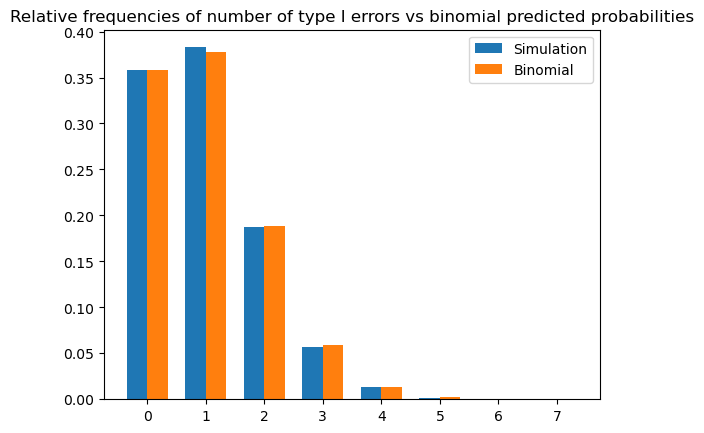

In [21]:
n =20
size =50

# comprobamos que si alguien se empeña en repetir un contaste muchas veces, 
# siempre vas a rechazar, porque siempre te va a tocar al menos una mala
# si hago 20 repetciones de un contraste... que probs tengo de rechazarlo?
# Es como hacer una binomial

data = np.array(np.random.default_rng(2022).normal(loc = 0, scale = 1, size = (50, 20, 10000)))
print(data.shape)

# comprobar la hipotesis nula verdadera por los dos lados
# esto me da una matriz de pvalores, porque hacemos 10000 pruebas para 20 poblaciones de tam 50
# calcula el pvalor para cada una de las poblaciones (muestras), 1000 veces
Tscores, pValues = stats.ttest_1samp(data, 
                                     popmean = 0, # media de la pob N(0,1)
                                     axis = 0, 
                                     alternative='two-sided')# por los dos lados
print(pValues)
# cuenta del error de tipo 1 (rechazar la h0 cuando es true)
counts, freqs = np.unique(np.sum(pValues < 0.05, axis=0), return_counts=True)

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
# Representamos el error de menor que 0.5
rects1 = ax.bar(counts - width/2,
                freqs/10000,
                width, 
                label='Simulation')
# calculamos la binomial y la representamos, buscamos el 0.5 porque es el 
# alpha de nuestro problema, para comparar con lo que hemos representado arriba (menor que 0.5)
rects2 = ax.bar(np.arange(8) + width/2,
                stats.binom.pmf(np.arange(8),# tamaño de la muestra
                                20, # porb de exito
                                0.05), #Num dentro de la muestra
                width, 
                label='Binomial')
ax.set_title('Relative frequencies of number of type I errors vs binomial predicted probabilities')
ax.legend()


+ **Ejercicio (S06-004)** aplique la corrección de Bonferroni al ejemplo anterior y averigüe cuántas de las $N$ simulaciones contienen al menos un error de tipo I. Recuerde que cada simulación consta de 20 pruebas independientes.

In [22]:
# En lugar de comparar que nuestro pvalor sea menor que alpha
# lo compararemos con alpha/m, siendo m el numero de pruebas realizadas 
#(20 pruebas en cada simulacion)

# cuenta del error de tipo 1 (rechazar la h0 cuando es true)
counts_bonf, freqs_bonf  = np.unique(np.sum(pValues < 0.05/20, axis=0), return_counts=True)
print(counts_bonf)
print(freqs_bonf)
print(freqs_bonf / 10000)

[0 1 2]
[9529  457   14]
[0.9529 0.0457 0.0014]


+ Esta cuestión del control de la tasa de error en las pruebas repetidas ha sido objeto de una intensa investigación estadística recientemente. En genómica, por ejemplo, es muy frecuente que se prueben decenas de miles de hipótesis (una prueba por cada gen del genoma).  En tales circunstancias, utilizar una corrección tipo Bonferroni sería demasiado drástico: rechazaríamos muy pocos de los nulos, lo que no dejaría espacio para el descubrimiento científico. Por tanto, necesitamos algún tipo de equilibrio entre los falsos descubrimientos y la ausencia de descubrimientos. 